In [1]:
#import functions
import mne
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import os
from mne_bids import BIDSPath, read_raw_bids, print_dir_tree, make_report
from mne_bids.path import get_bids_path_from_fname
from ecog_preproc_utils import transformData
from GetData import getSubjects, getData

In [3]:
data_dir = "/home/jovyan/ieegmovie_data/"
#set directories for each freq
hg_dir=data_dir+"corrMaps/HighGamma/"
car_dir=data_dir+"corrMaps/CAR/"
alpha_dir=data_dir+"corrMaps/alpha/"
theta_dir=data_dir+"corrMaps/theta/"

In [4]:
#get subjects
subjects=getSubjects(data_dir)

print(subjects)

['sub-07', 'sub-09', 'sub-14', 'sub-16', 'sub-18', 'sub-22', 'sub-24', 'sub-27', 'sub-41', 'sub-45', 'sub-46', 'sub-51', 'sub-55', 'sub-60']


In [5]:
## Setup variables for rest data
sess = 'iemu'
task = 'rest'
acq = 'clinical'
run = "1"

In [ ]:
#save correlation matrices for rest data
for subj in subjects:
    try:
        subj_data=getData(subj, data_dir, sess, task, acq, run)
        bids_path=subj_data.getBidsPath()
        #get data
        hg_data=subj_data.getHGData().get_data()
        car_data=subj_data.getCARData().get_data()
        alpha_data=subj_data.getAlphaData().get_data()
        theta_data=subj_data.getThetaData().get_data()
        #get correlation matrix
        hg_corr = np.corrcoef(hg_data)
        car_corr= np.corrcoef(car_data)
        alpha_corr = np.corrcoef(alpha_data)
        theta_corr = np.corrcoef(theta_data)
        #save corr mat
        save_path=data_dir+"corrMaps/"
        hg_save= os.path.join(save_path+"HighGamma/", f'{bids_path.basename}_HighGamma_corr.npy')
        car_save= os.path.join(save_path+"CAR/", f'{bids_path.basename}_CAR_corr.npy')
        alpha_save= os.path.join(save_path+"alpha/", f'{bids_path.basename}_alpha_corr.npy')
        theta_save= os.path.join(save_path+"theta/", f'{bids_path.basename}_theta_corr.npy')
        np.save(hg_save, hg_corr)
        np.save(car_save, car_corr)
        np.save(alpha_save, alpha_corr)
        np.save(theta_save, theta_corr)
    except:
        print(subj+"not found")

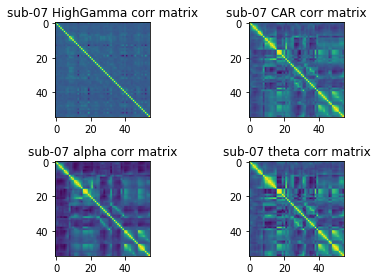

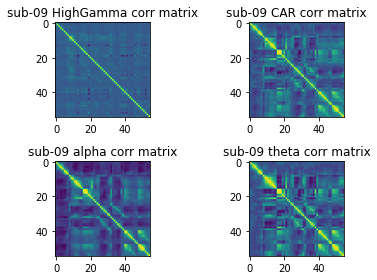

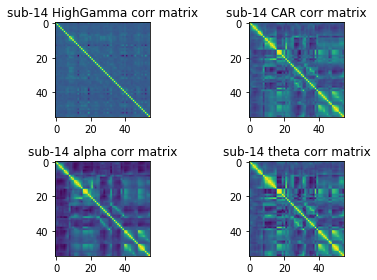

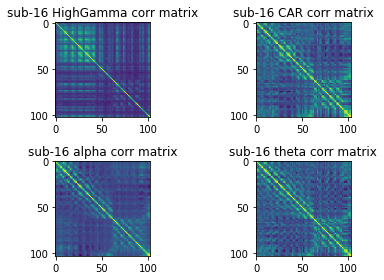

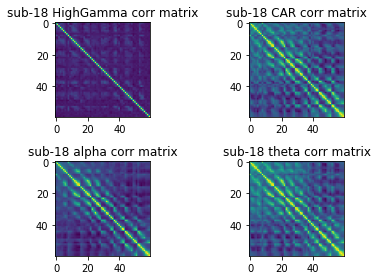

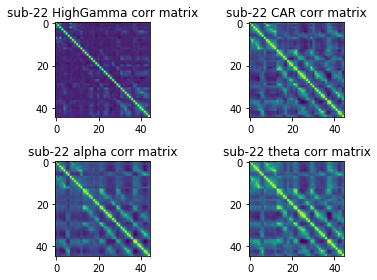

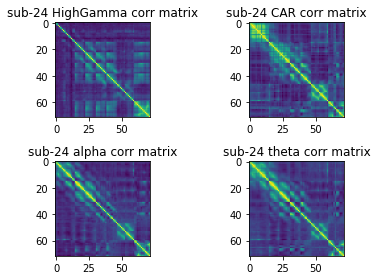

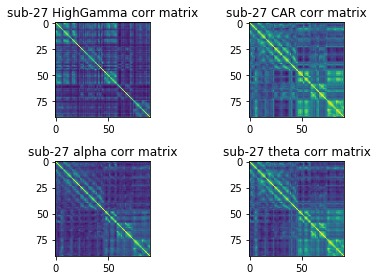

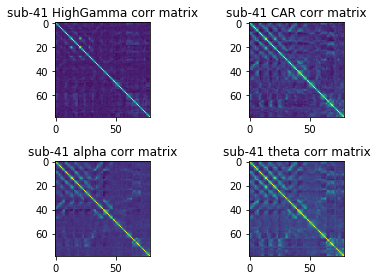

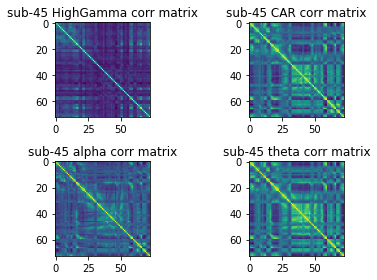

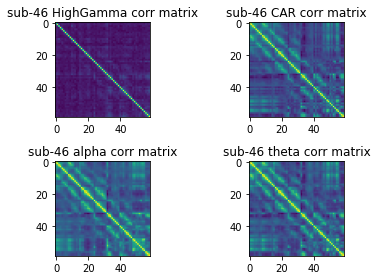

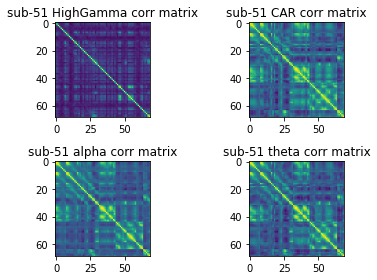

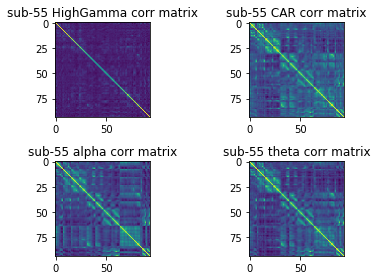

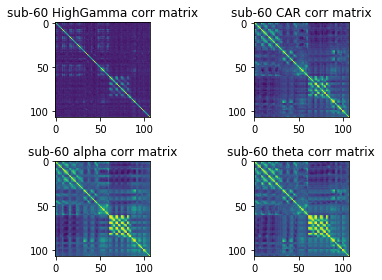

In [17]:
#plot and save rest correlation matrices
hg_dir=data_dir+"corrMaps/HighGamma/"
car_dir=data_dir+"corrMaps/CAR/"
alpha_dir=data_dir+"corrMaps/alpha/"
theta_dir=data_dir+"corrMaps/theta/"
for subj in subjects:
    for hgfile in os.listdir(hg_dir):
        if hgfile.startswith(subj) and "rest" in hgfile:
            hg_dat=np.load(hg_dir+hgfile)
    for carfile in os.listdir(car_dir):
        if carfile.startswith(subj) and "rest" in carfile:
            car_dat=np.load(car_dir+carfile)
    for alphafile in os.listdir(alpha_dir):
        if alphafile.startswith(subj) and "rest" in alphafile:
            alpha_dat=np.load(alpha_dir+alphafile)     
    for thetafile in os.listdir(theta_dir):
        if thetafile.startswith(subj) and "rest" in thetafile:
            theta_dat=np.load(theta_dir+thetafile)
    fig, axs = plt.subplots(2,2)
    axs[0,0].imshow(hg_dat)
    axs[0,0].set_title(subj + " HighGamma corr matrix")
    axs[0,1].imshow(car_dat)
    axs[0,1].set_title(subj + " CAR corr matrix")
    axs[1,0].imshow(alpha_dat)
    axs[1,0].set_title(subj + " alpha corr matrix")
    axs[1,1].imshow(theta_dat)
    axs[1,1].set_title(subj + " theta corr matrix")
    plt.tight_layout()
    plt.savefig("/home/jovyan/ieegmovie/corrMatrices/rest/"+subj+"_rest-corrMat.png")

In [6]:
## Setup variables for task data
sess = 'iemu'
task_film = 'film'
acq = 'clinical'
run = "1"

In [ ]:
#save correlation matrices for task data
for subj in subjects:
    try:
        subj_data=getData(subj, data_dir, sess, task_film, acq, run)
        bids_path=subj_data.getBidsPath()
        #get data
        hg_data=subj_data.getHGData().get_data()
        car_data=subj_data.getCARData().get_data()
        alpha_data=subj_data.getAlphaData().get_data()
        theta_data=subj_data.getThetaData().get_data()
        #get correlation matrix
        hg_corr = np.corrcoef(hg_data)
        car_corr= np.corrcoef(car_data)
        alpha_corr = np.corrcoef(alpha_data)
        theta_corr = np.corrcoef(theta_data)
        #save corr mat
        save_path=data_dir+"corrMaps/"
        hg_save= os.path.join(save_path+"HighGamma/", f'{bids_path.basename}_HighGamma_corr.npy')
        car_save= os.path.join(save_path+"CAR/", f'{bids_path.basename}_CAR_corr.npy')
        alpha_save= os.path.join(save_path+"alpha/", f'{bids_path.basename}_alpha_corr.npy')
        theta_save= os.path.join(save_path+"theta/", f'{bids_path.basename}_theta_corr.npy')
        np.save(hg_save, hg_corr)
        np.save(car_save, car_corr)
        np.save(alpha_save, alpha_corr)
        np.save(theta_save, theta_corr)
    except:
        print(subj+"not found")
        

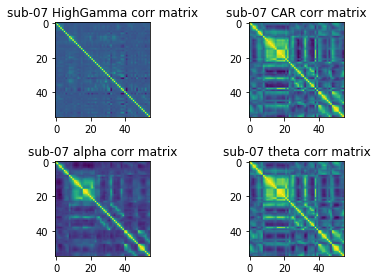

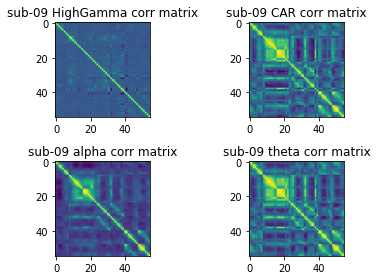

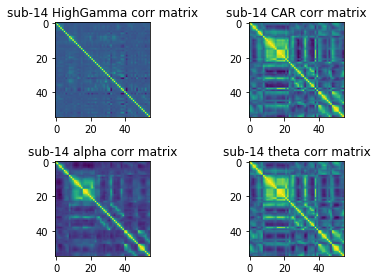

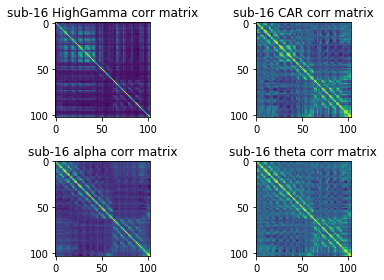

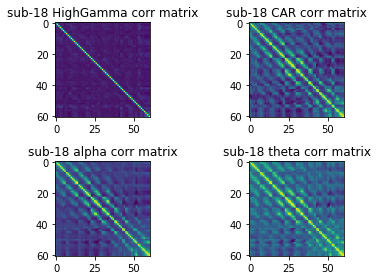

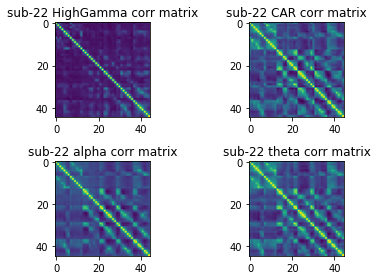

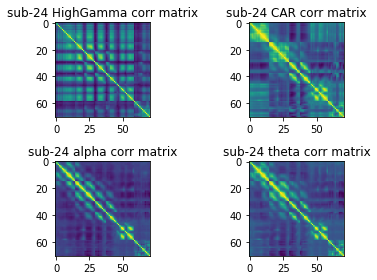

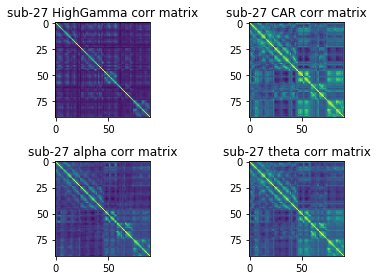

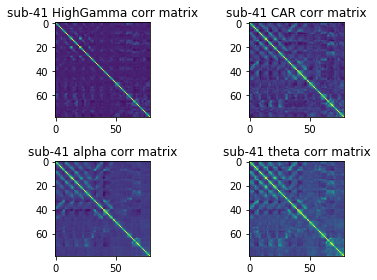

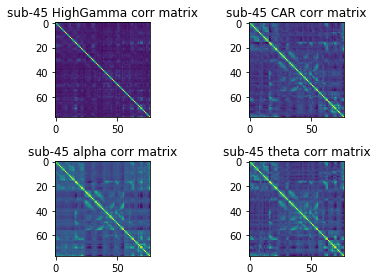

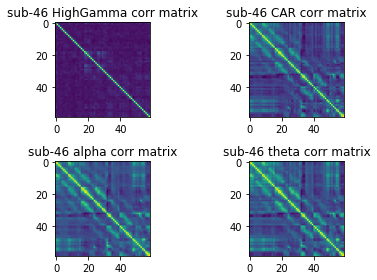

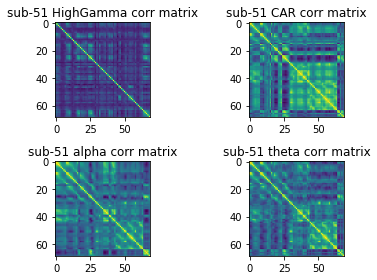

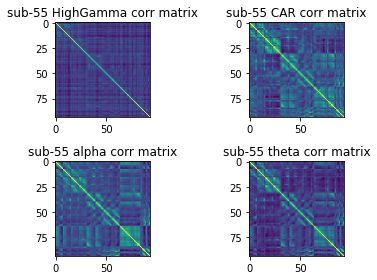

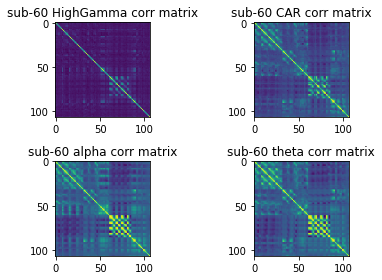

In [19]:
#plot task correlation matrices
for subj in subjects:
    for hgfile in os.listdir(hg_dir):
        if hgfile.startswith(subj) and "film" in hgfile:
            hg_dat=np.load(hg_dir+hgfile)
    for carfile in os.listdir(car_dir):
        if carfile.startswith(subj) and "film" in carfile:
            car_dat=np.load(car_dir+carfile)
    for alphafile in os.listdir(alpha_dir):
        if alphafile.startswith(subj) and "film" in alphafile:
            alpha_dat=np.load(alpha_dir+alphafile)     
    for thetafile in os.listdir(theta_dir):
        if thetafile.startswith(subj) and "film" in thetafile:
            theta_dat=np.load(theta_dir+thetafile)
    fig, axs = plt.subplots(2,2)
    axs[0,0].imshow(hg_dat)
    axs[0,0].set_title(subj + " HighGamma corr matrix")
    axs[0,1].imshow(car_dat)
    axs[0,1].set_title(subj + " CAR corr matrix")
    axs[1,0].imshow(alpha_dat)
    axs[1,0].set_title(subj + " alpha corr matrix")
    axs[1,1].imshow(theta_dat)
    axs[1,1].set_title(subj + " theta corr matrix")
    plt.tight_layout()
    plt.savefig("/home/jovyan/ieegmovie/corrMatrices/task/"+subj+"_task-corrMat.png")